In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, roc_curve
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

In [ ]:
df = pd.read_csv('creditworthiness.csv')

In [ ]:
df.head()

,functionary,re-balanced (paid back) a recently overdrawn current acount,FI3O credit score,gender,0. accounts at other banks,credit refused in past?,years employed,savings on other accounts,self employed?,max. account balance 12 months ago,...,max. account balance 3 months ago,min. account balance 3 months ago,avrg. account balance 3 months ago,max. account balance 2 months ago,min. account balance 2 months ago,avrg. account balance 2 months ago,max. account balance 1 months ago,min. account balance 1 months ago,avrg. account balance 1 months ago,credit rating
0,1,1,0,0,4,1,3,3,1,4,...,2,1,2,5,2,5,1,5,4,0
1,0,0,1,0,1,0,5,2,1,3,...,3,2,1,5,5,5,4,4,1,0
2,0,1,0,1,4,0,3,3,1,5,...,3,1,3,3,5,5,5,3,2,0
3,0,1,0,0,5,0,1,1,0,2,...,4,4,5,5,5,3,1,1,4,0
4,1,1,1,0,2,0,1,1,0,1,...,5,2,5,1,3,4,2,5,5,2


In [ ]:
df.describe()

,functionary,re-balanced (paid back) a recently overdrawn current acount,FI3O credit score,gender,0. accounts at other banks,credit refused in past?,years employed,savings on other accounts,self employed?,max. account balance 12 months ago,...,max. account balance 3 months ago,min. account balance 3 months ago,avrg. account balance 3 months ago,max. account balance 2 months ago,min. account balance 2 months ago,avrg. account balance 2 months ago,max. account balance 1 months ago,min. account balance 1 months ago,avrg. account balance 1 months ago,credit rating
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,...,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000
mean,0.278400,0.851600,0.819600,0.494000,3.048000,0.13360,3.010800,3.141600,0.196800,2.958000,...,3.021200,3.019200,3.039600,2.996400,3.011200,3.020400,2.973200,2.952400,3.01120,1.580000
std,0.448301,0.355567,0.384597,0.500064,1.419331,0.34029,1.403806,1.804786,0.397659,1.394351,...,1.422378,1.390973,1.419732,1.394692,1.434677,1.408537,1.406155,1.405035,1.39336,1.040016
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,1.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,2.000000,0.00000,2.000000,2.000000,0.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,1.000000
50%,0.000000,1.000000,1.000000,0.000000,3.000000,0.00000,3.000000,3.000000,0.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,2.000000
75%,1.000000,1.000000,1.000000,1.000000,4.000000,0.00000,4.000000,5.000000,0.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,2.000000
max,1.000000,1.000000,1.000000,1.000000,5.000000,1.00000,5.000000,6.000000,1.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,3.000000


<Axes: xlabel='credit rating'>

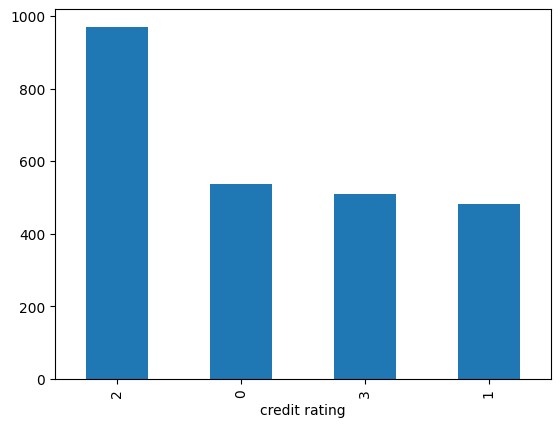

In [ ]:
df['credit rating'].value_counts().plot(kind='bar')

In [ ]:
df['credit rating'].value_counts()

credit rating
2    970
0    538
3    509
1    483
Name: count, dtype: int64

In [ ]:
import pandas as pd

df['credit rating binary'] = df['credit rating'].apply(lambda x: 1 if x in [2, 3] else 0)

df.drop(columns=['credit rating'], inplace=True)

print(df['credit rating binary'].value_counts())

credit rating binary
1    1479
0    1021
Name: count, dtype: int64


In [ ]:
import pandas as pd
from sklearn.utils import resample

df_majority = df[df['credit rating'] == 2]
df_minority_0 = df[df['credit rating'] == 0]
df_minority_1 = df[df['credit rating'] == 1]
df_minority_3 = df[df['credit rating'] == 3]

df_majority_undersampled = resample(df_majority,
                                    replace=False,
                                    n_samples=538,
                                    random_state=42)

df_undersampled = pd.concat([df_majority_undersampled, df_minority_0, df_minority_1, df_minority_3])

# Shuffle the dataset
df_undersampled = df_undersampled.sample(frac=1, random_state=42).reset_index(drop=True)

<Axes: xlabel='credit rating'>

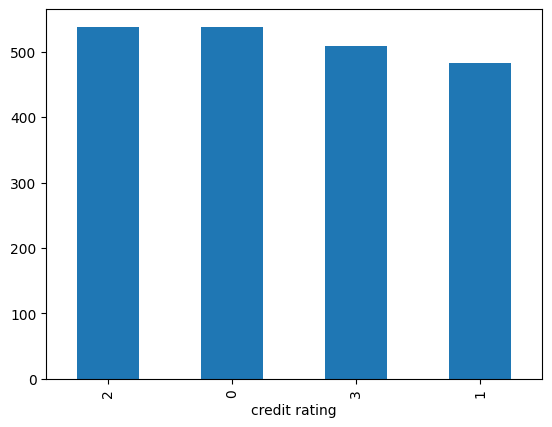

In [ ]:
df_undersampled['credit rating'].value_counts().plot(kind='bar')

In [ ]:
df.dtypes

functionary                                                    int64
re-balanced (paid back) a recently overdrawn current acount    int64
FI3O credit score                                              int64
gender                                                         int64
0. accounts at other banks                                     int64
credit refused in past?                                        int64
years employed                                                 int64
savings on other accounts                                      int64
self employed?                                                 int64
max. account balance 12 months ago                             int64
min. account balance 12 months ago                             int64
avrg. account balance 12 months ago                            int64
max. account balance 11 months ago                             int64
min. account balance 11 months ago                             int64
avrg. account balance 11 months ag

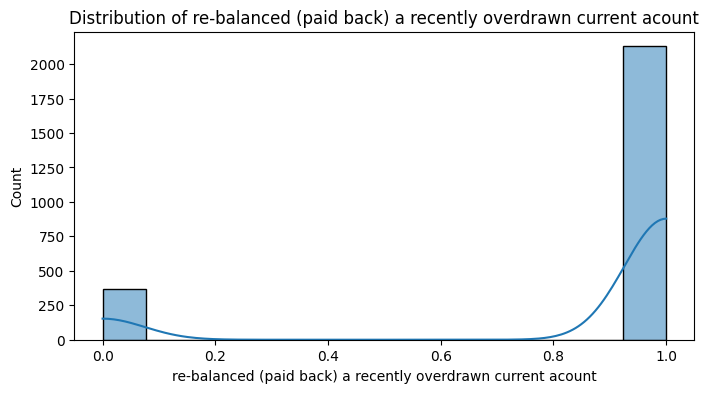

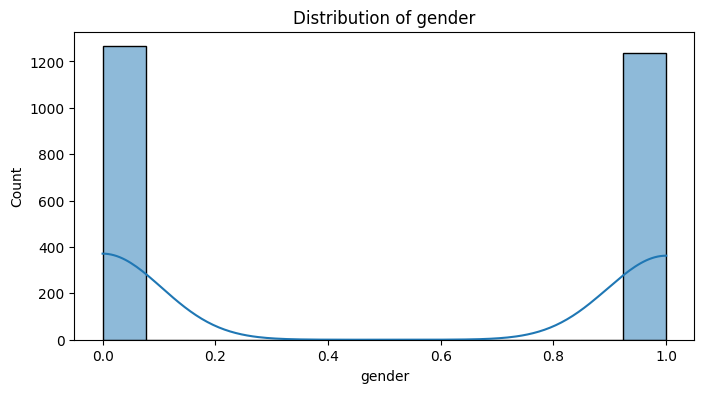

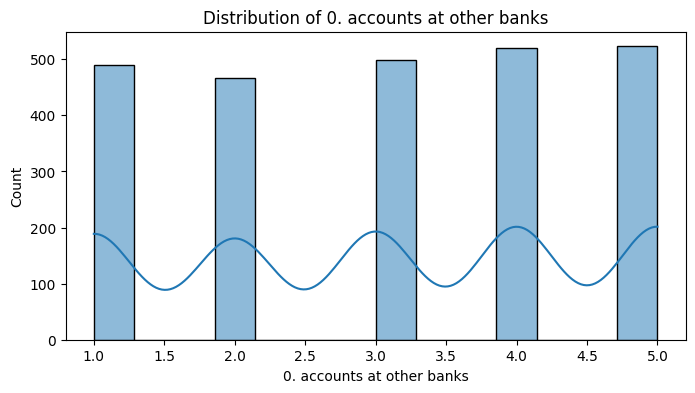

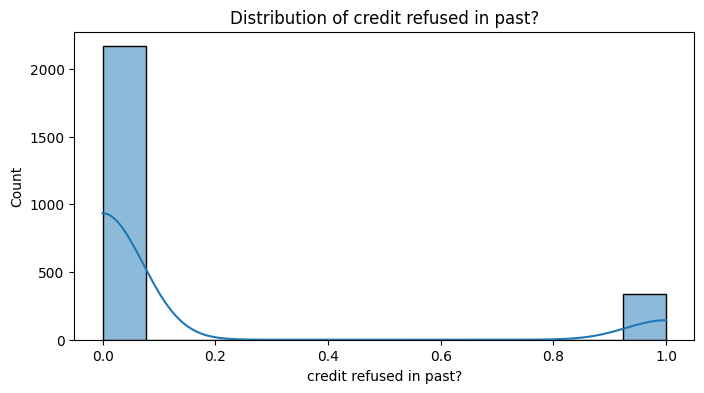

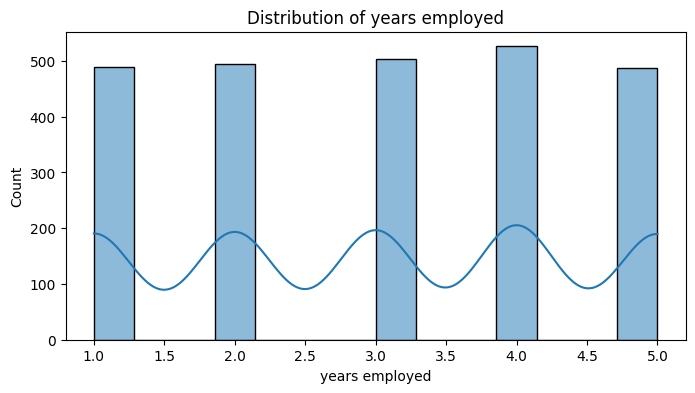

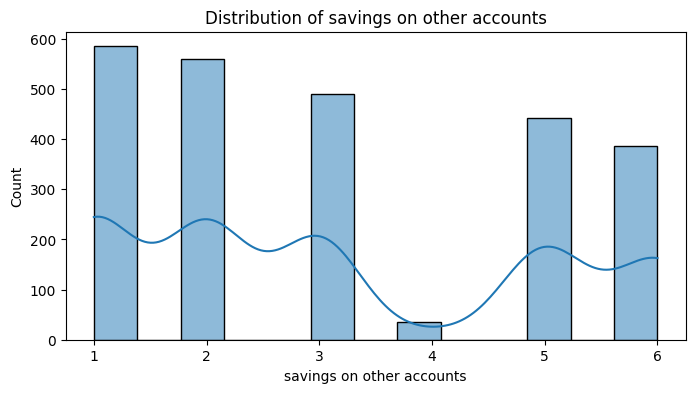

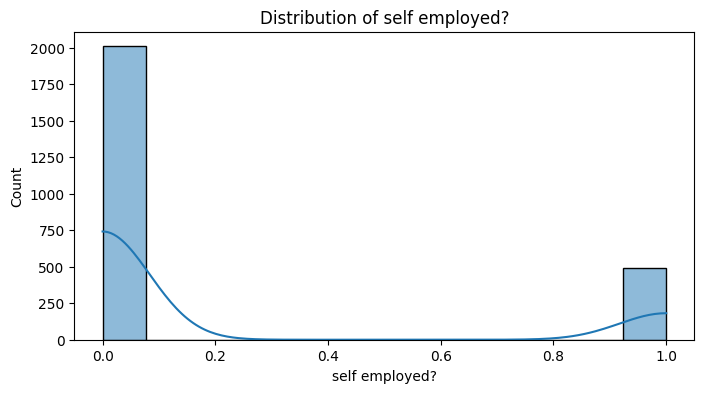

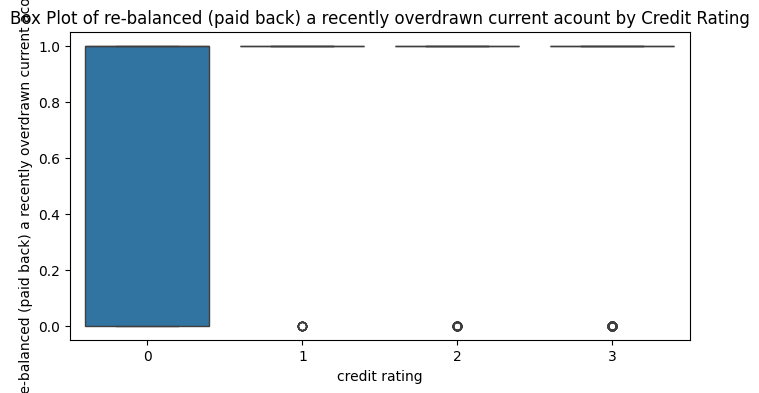

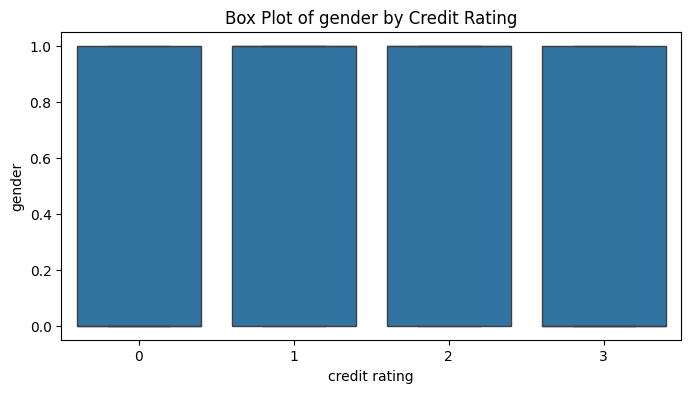

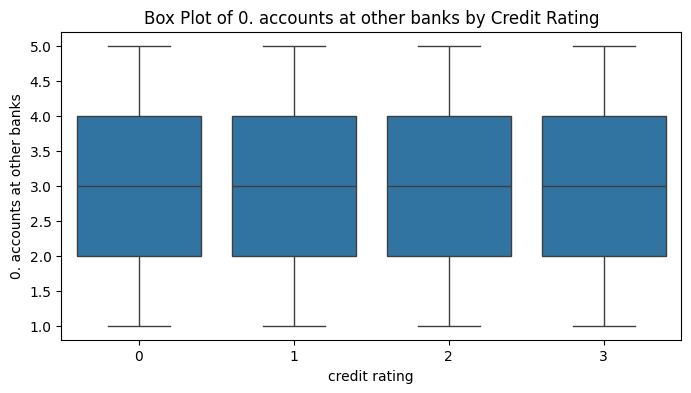

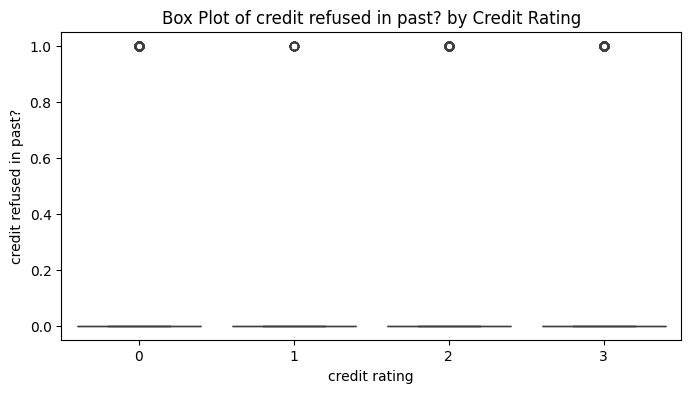

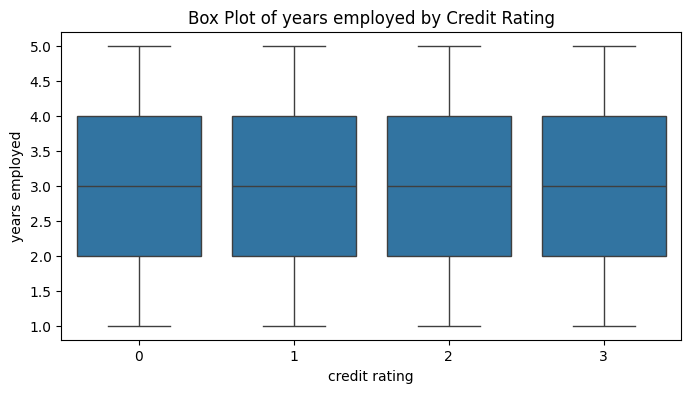

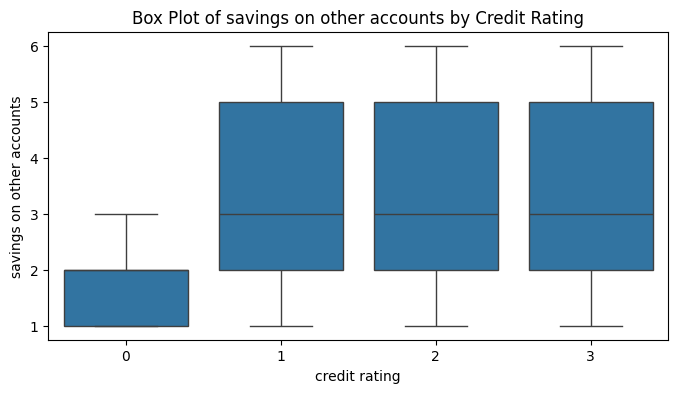

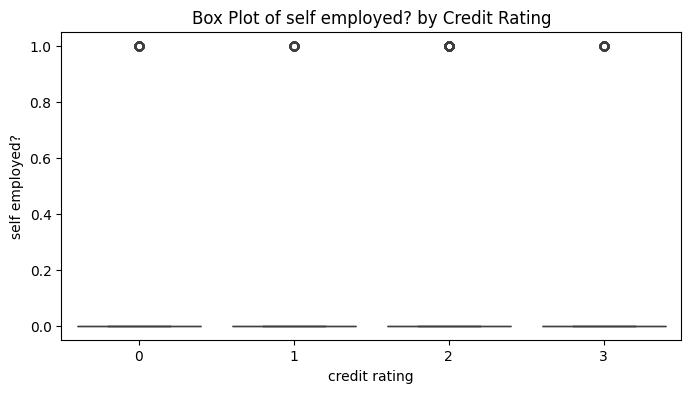

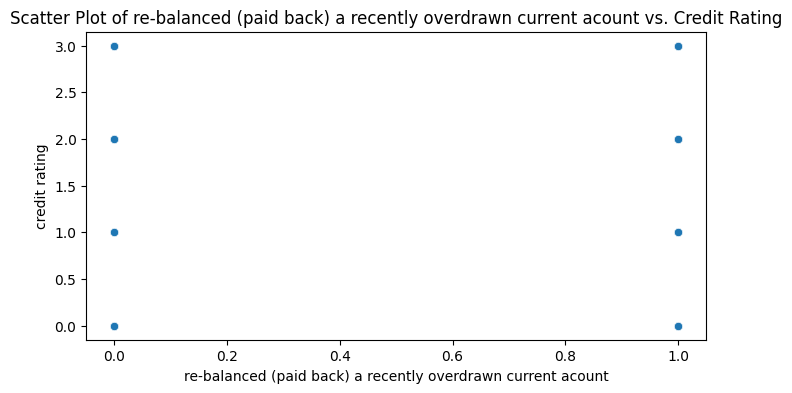

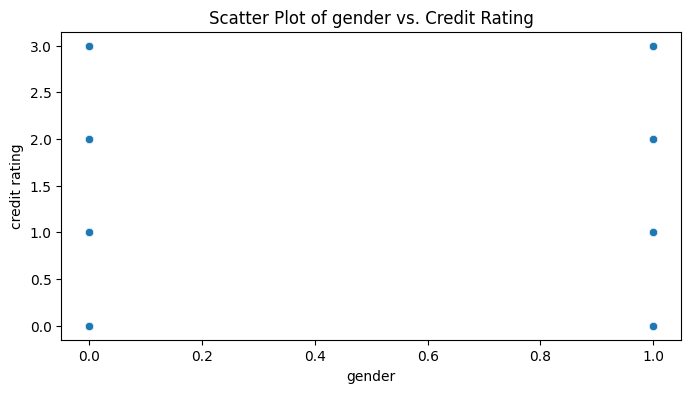

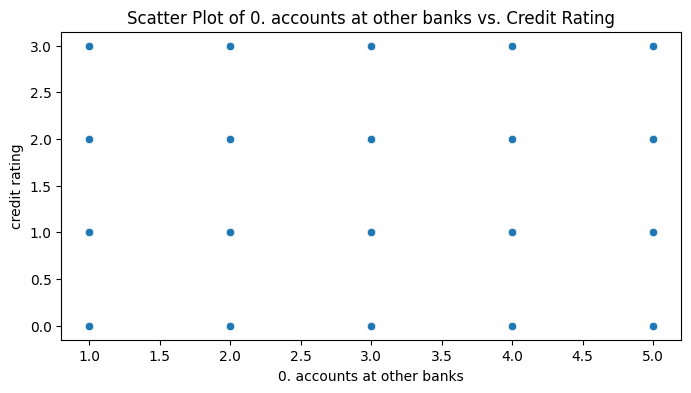

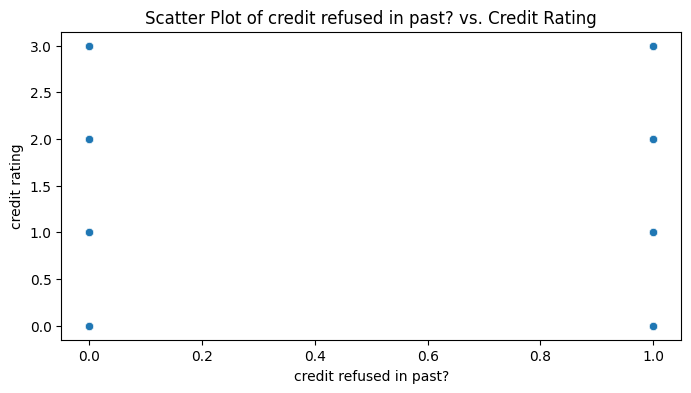

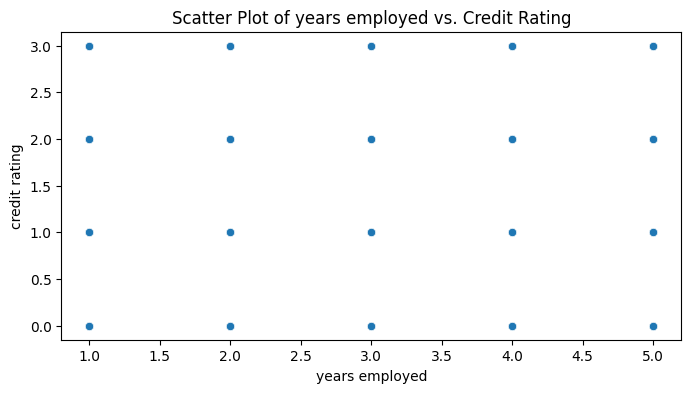

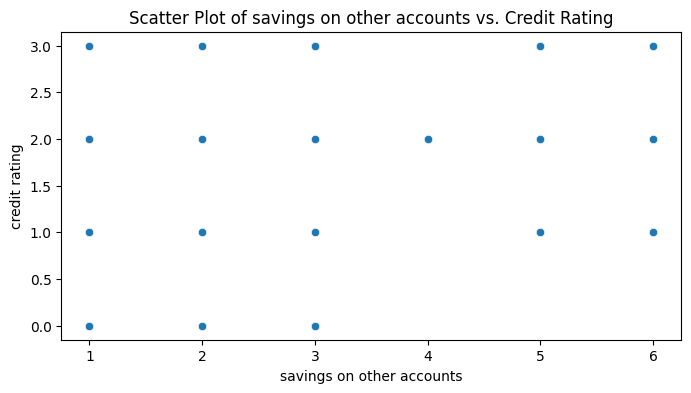

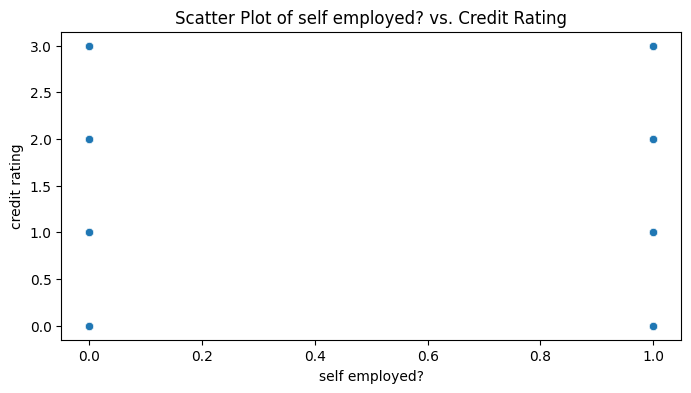

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

all_features = ["re-balanced (paid back) a recently overdrawn current acount", "gender", "0. accounts at other banks", "credit refused in past?", "years employed", "savings on other accounts", "self employed?"]

for feature in all_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

for feature in all_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='credit rating', y=feature, data=df)
    plt.title(f'Box Plot of {feature} by Credit Rating')
    plt.show()

for feature in all_features:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=feature, y='credit rating', data=df)
    plt.title(f'Scatter Plot of {feature} vs. Credit Rating')
    plt.show()

In [ ]:
scaler = StandardScaler()
X = df_undersampled.drop('credit rating', axis=1)
y = df_undersampled['credit rating']
X_standardized = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.1, random_state=32)

In [ ]:
param_grids = {
    'Logistic Regression': {'estimator__C': [0.1, 1, 10, 100, 120, 150]},
    'Decision Tree': {'criterion': ['gini', 'entropy'], 'max_depth': [4, 5, 6, 8]},
    'Random Forest': {'n_estimators': [50, 75,100,120, 150, 200,230], 'max_depth': [None, 5, 10]},
    'Gradient Boosting': {'n_estimators': [10, 20, 40,50, 60], 'learning_rate': [0.01, 0.1, 1]}
}

models = {
    'Logistic Regression': OneVsRestClassifier(LogisticRegression(solver='liblinear')),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

results = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grid=param_grids[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)
    y_pred_proba = grid_search.predict_proba(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro')

    results[name] = {
        'Accuracy': accuracy,
        'ROC AUC (Macro)': roc_auc,
        'Best Parameters': grid_search.best_params_
    }

def remove_estimator_prefix(params):
    return {key.replace('estimator__', ''): value for key, value in params.items()}

best_models = {name: remove_estimator_prefix(results[name]['Best Parameters']) for name in results.keys()}

ensemble_model = VotingClassifier(estimators=[
    ('Logistic Regression', OneVsRestClassifier(LogisticRegression(**best_models['Logistic Regression'], solver='liblinear'))),
    ('Decision Tree', DecisionTreeClassifier(**best_models['Decision Tree'])),
    ('Random Forest', RandomForestClassifier(**best_models['Random Forest'])),
    ('Gradient Boosting', GradientBoostingClassifier(**best_models['Gradient Boosting']))
], voting='soft')

ensemble_model.fit(X_train, y_train)

y_pred_ensemble = ensemble_model.predict(X_test)
y_pred_proba_ensemble = ensemble_model.predict_proba(X_test)

accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
roc_auc_ensemble = roc_auc_score(y_test, y_pred_proba_ensemble, multi_class='ovr', average='macro')

print(f'Ensemble Model Accuracy: {accuracy_ensemble:.4f}')
print(f'Ensemble Model ROC AUC (Macro): {roc_auc_ensemble:.4f}')


results_df = pd.DataFrame(results)
print(results_df.to_markdown(numalign="left", stralign="left"))

Ensemble Model Accuracy: 0.6570
Ensemble Model ROC AUC (Macro): 0.8265
|                 | Logistic Regression   | Decision Tree                            | Random Forest                            | Gradient Boosting                          |
|:----------------|:----------------------|:-----------------------------------------|:-----------------------------------------|:-------------------------------------------|
| Accuracy        | 0.6666666666666666    | 0.6280193236714976                       | 0.6521739130434783                       | 0.6376811594202898                         |
| ROC AUC (Macro) | 0.8195904445943272    | 0.8262247394272102                       | 0.8319982349686607                       | 0.8245719770012713                         |
| Best Parameters | {'estimator__C': 10}  | {'criterion': 'entropy', 'max_depth': 6} | {'max_depth': None, 'n_estimators': 230} | {'learning_rate': 0.1, 'n_estimators': 20} |


Macro average ROC AUC for Ensemble Model: 0.8260


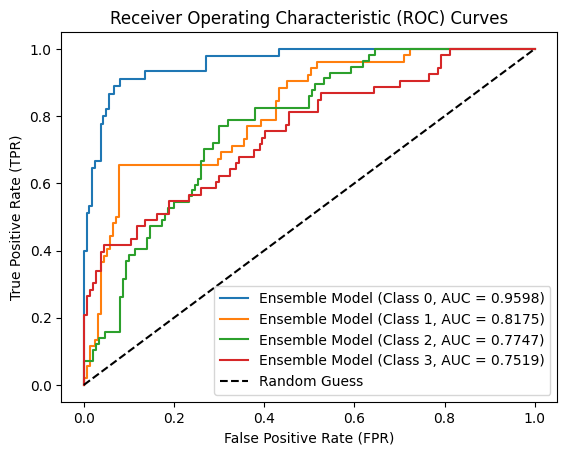

In [ ]:
y_test_binarized = label_binarize(y_test, classes=range(len(df['credit rating'].unique())))

fpr_ensemble = {}
tpr_ensemble = {}
roc_auc_ensemble = {}
for i in range(len(df['credit rating'].unique())):
    fpr_ensemble[i], tpr_ensemble[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba_ensemble[:, i])
    roc_auc_ensemble[i] = roc_auc_score(y_test_binarized[:, i], y_pred_proba_ensemble[:, i])

for i in range(len(df['credit rating'].unique())):
    plt.plot(fpr_ensemble[i], tpr_ensemble[i], label=f'Ensemble Model (Class {i}, AUC = {roc_auc_ensemble[i]:.4f})')

roc_auc_macro_ensemble = roc_auc_score(y_test_binarized, y_pred_proba_ensemble, average='macro')
print(f'Macro average ROC AUC for Ensemble Model: {roc_auc_macro_ensemble:.4f}')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()